In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(60, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 44ms/step - loss: 0.0313
Epoch 2/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 3/100
20/20 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 4/100
20/20 [==============================] - 1s 44ms/step - loss: 7.3224e-04
Epoch 5/100
20/20 [==============================] - 1s 50ms/step - loss: 6.6398e-04
Epoch 6/100
20/20 [==============================] - 1s 71ms/step - loss: 6.4073e-04
Epoch 7/100
20/20 [==============================] - 2s 75ms/step - loss: 6.2467e-04
Epoch 8/100
20/20 [==============================] - 1s 48ms/step - loss: 6.0769e-04
Epoch 9/100
20/20 [==============================] - 1s 43ms/step - loss: 5.8614e-04
Epoch 10/100
20/20 [==============================] - 1s 42ms/step - loss: 5.7199e-04
Epoch 11/100
20/20 [==============================] - 1s 44ms/step - loss: 5.6838e-04
Epoch 12/100
20/20 [==============================] - 1s 44ms/step - loss: 

In [10]:
# 10. Dự đoán trên tập train và test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 10ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 2329.622102858126
Testing MAPE: 537434.3319665907
Testing MSE: 5427139.142125117


In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [14]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [15]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

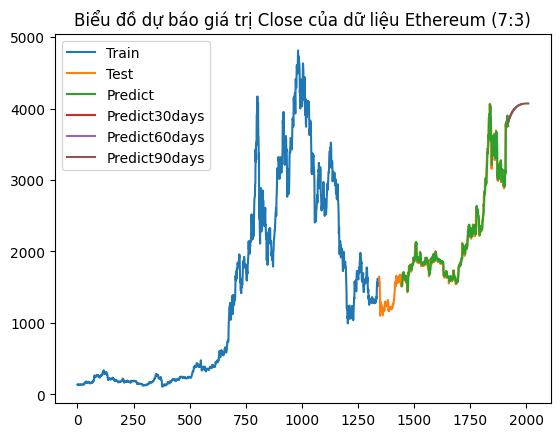

In [16]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (7:3)")
plt.show()

In [17]:
x_input.shape

(1, 100, 1)

In [18]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [19]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [20]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [21]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 44ms/step - loss: 3.8973e-04
Epoch 2/100
23/23 [==============================] - 1s 44ms/step - loss: 3.6498e-04
Epoch 3/100
23/23 [==============================] - 1s 44ms/step - loss: 3.6549e-04
Epoch 4/100
23/23 [==============================] - 1s 47ms/step - loss: 3.7069e-04
Epoch 5/100
23/23 [==============================] - 2s 72ms/step - loss: 4.1468e-04
Epoch 6/100
23/23 [==============================] - 2s 76ms/step - loss: 3.8380e-04
Epoch 7/100
23/23 [==============================] - 1s 44ms/step - loss: 3.7982e-04
Epoch 8/100
23/23 [==============================] - 1s 43ms/step - loss: 4.0225e-04
Epoch 9/100
23/23 [==============================] - 1s 43ms/step - loss: 3.9365e-04
Epoch 10/100
23/23 [==============================] - 1s 44ms/step - loss: 3.6844e-04
Epoch 11/100
23/23 [==============================] - 1s 44ms/step - loss: 3.6595e-04
Epoch 12/100
23/23 [==============================] - 1s 43ms/s

In [22]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 10ms/step


In [23]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [24]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 2631.6275515309917
Testing MAPE: 543667.6600454032
Testing MSE: 6925463.569977003


In [25]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [26]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [27]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

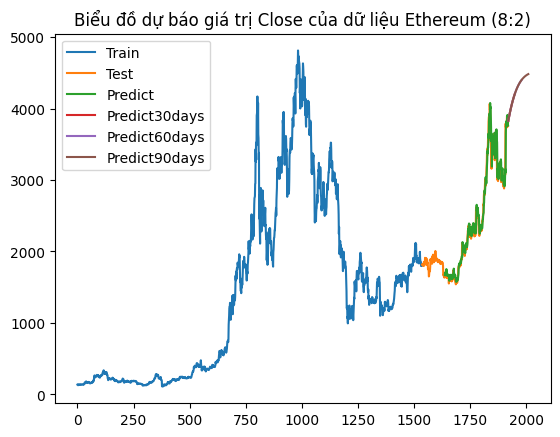

In [28]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
prediect_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))
prediect_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (8:2)")
plt.show()

In [29]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [30]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [31]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [32]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 43ms/step - loss: 3.3664e-04
Epoch 2/100
26/26 [==============================] - 1s 43ms/step - loss: 3.3700e-04
Epoch 3/100
26/26 [==============================] - 1s 44ms/step - loss: 3.5076e-04
Epoch 4/100
26/26 [==============================] - 1s 43ms/step - loss: 3.4358e-04
Epoch 5/100
26/26 [==============================] - 1s 43ms/step - loss: 3.3761e-04
Epoch 6/100
26/26 [==============================] - 1s 43ms/step - loss: 3.4792e-04
Epoch 7/100
26/26 [==============================] - 2s 67ms/step - loss: 3.4982e-04
Epoch 8/100
26/26 [==============================] - 2s 75ms/step - loss: 3.3752e-04
Epoch 9/100
26/26 [==============================] - 1s 43ms/step - loss: 3.3341e-04
Epoch 10/100
26/26 [==============================] - 1s 43ms/step - loss: 3.5307e-04
Epoch 11/100
26/26 [==============================] - 1s 44ms/step - loss: 3.3949e-04
Epoch 12/100
26/26 [==============================] - 1s 44ms/s

In [33]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 11ms/step


In [34]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [35]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 3400.7002244105684
Testing MAPE: 489304.07263811986
Testing MSE: 11564762.016306091


In [36]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [37]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [38]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

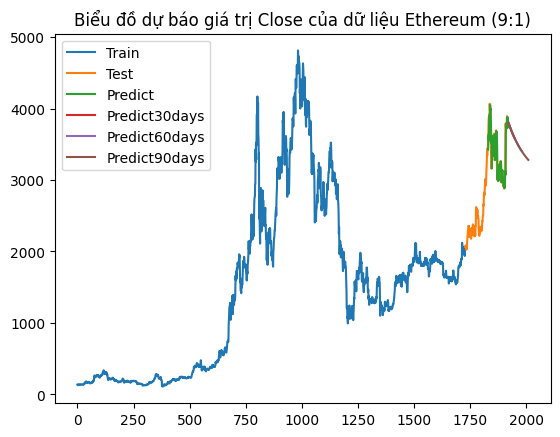

In [39]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (9:1)")
plt.show()